In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [6]:
def f(a, b, c, x) :
    y = a*x[0] + b*x[1] + c 
    if y > 0 :
        return 1
    else :
        return -1 
    
def h(a, b, c, x) :
    y = a*x[0] + b*x[1] + c 
    if y > 0 :
        return 1
    else :
        return -1

Number of Iterations=5


Text(0.5, 1.0, 'Perceptron Learning Algorithm')

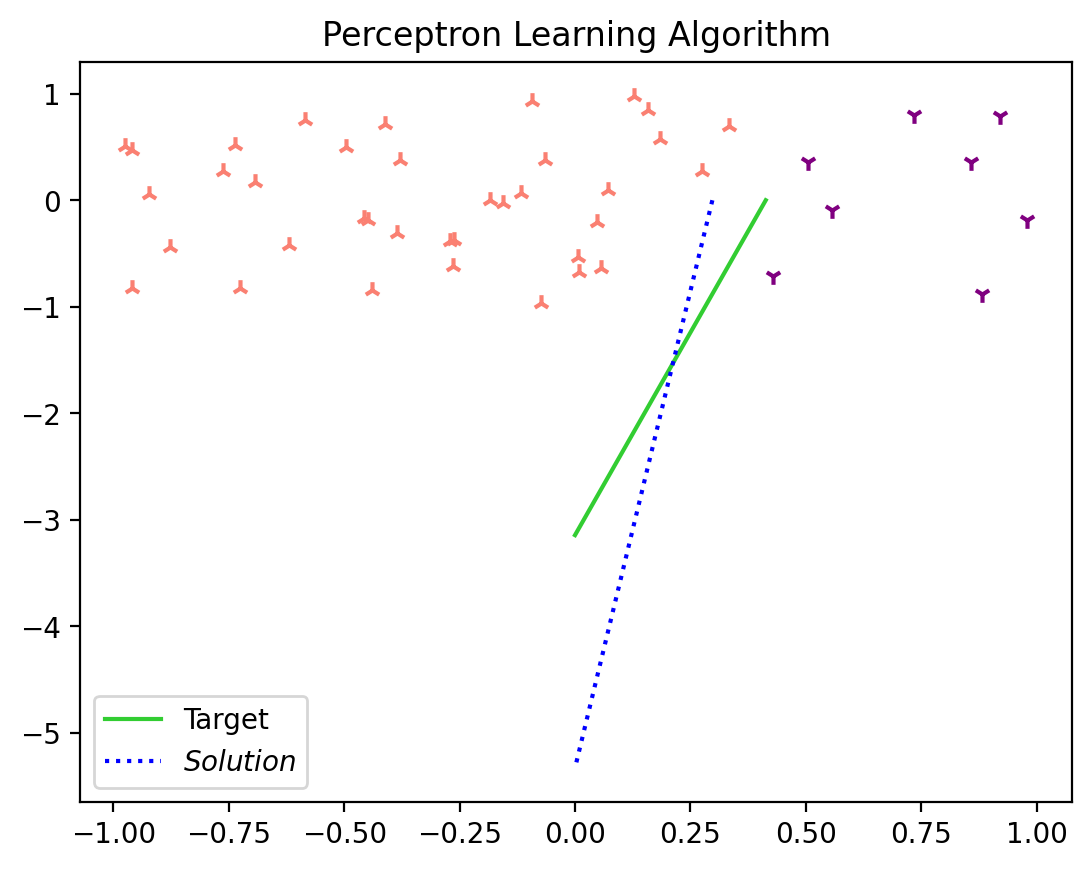

In [7]:
# Generating a random target function :
# Target equation : ax+by+c = 0 ; we will generate a, b, c randomly
w_tgt = np.random.uniform(-1, 1, 3) # W_tgt = [a, b, c]
intercept_01 = [-1*w_tgt[2]/w_tgt[0], 0]
intercept_02 = [0, -1*w_tgt[2]/w_tgt[1]]

# Generating data set for training :
N_data = 45
x = [np.random.uniform(-1, 1, 2) for i in range(N_data)]
y = [f(w_tgt[0], w_tgt[1], w_tgt[2], x[i]) for i in range(N_data)]

# Visualization of results :
fig, ax = plt.subplots()
ax.plot(intercept_01, intercept_02, color='limegreen', label='Target')
for i in range(N_data) :
    if y[i] == 1 :
        ax.scatter(x[i][0], x[i][1], color='salmon', marker='2')
    else :
        ax.scatter(x[i][0], x[i][1], color='purple', marker='1')

# Initiating Perceptron Learning Algorithm {hyp = hypothesis}:
w_hyp = np.random.uniform(-1, 1, 3)
n_misclsfd = 0 # Tracks number of misclassified points in each iteration
bad_index = [] # Storing the indexes of misclassified points in each iteration 
for i in range(N_data) :
    if h(w_hyp[0], w_hyp[1], w_hyp[2], x[i]) != f(w_tgt[0], w_tgt[1], w_tgt[2], x[i]) :
        n_misclsfd += 1
        bad_index.append(i)
H = [] # Hypothesis set travelled
n_iterations = 0
while n_misclsfd !=0 :
    n_iterations += 1
    x_misclsfd = [x[bad_index[0]][0], x[bad_index[0]][1], 1]
    w_hyp = w_hyp + np.dot(x_misclsfd,  y[bad_index[0]])
    H.append(w_hyp)
    n_misclsfd = 0
    bad_index = []
    for i in range(N_data) :
        if h(w_hyp[0], w_hyp[1], w_hyp[2], x[i]) != f(w_tgt[0], w_tgt[1], w_tgt[2], x[i]) :
            n_misclsfd += 1
            bad_index.append(i)


print(f'Number of Iterations={n_iterations}')
hyp_icpt_01 = [-1*w_hyp[2]/w_hyp[0], 0]
hyp_icpt_02 = [0, -1*w_hyp[2]/w_hyp[1]]
ax.plot(hyp_icpt_01, hyp_icpt_02, color='blue', label=f'$Solution$', ls=':')
ax.legend()
ax.set_title(f'Perceptron Learning Algorithm')

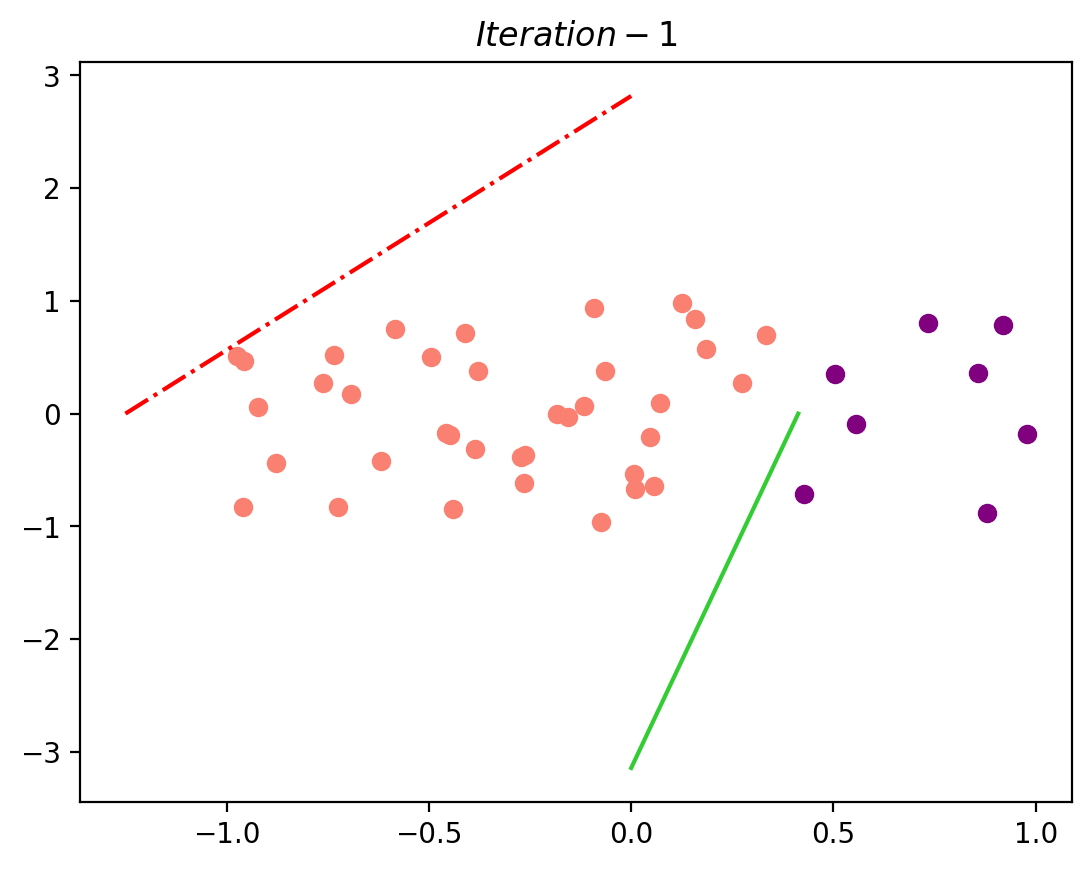

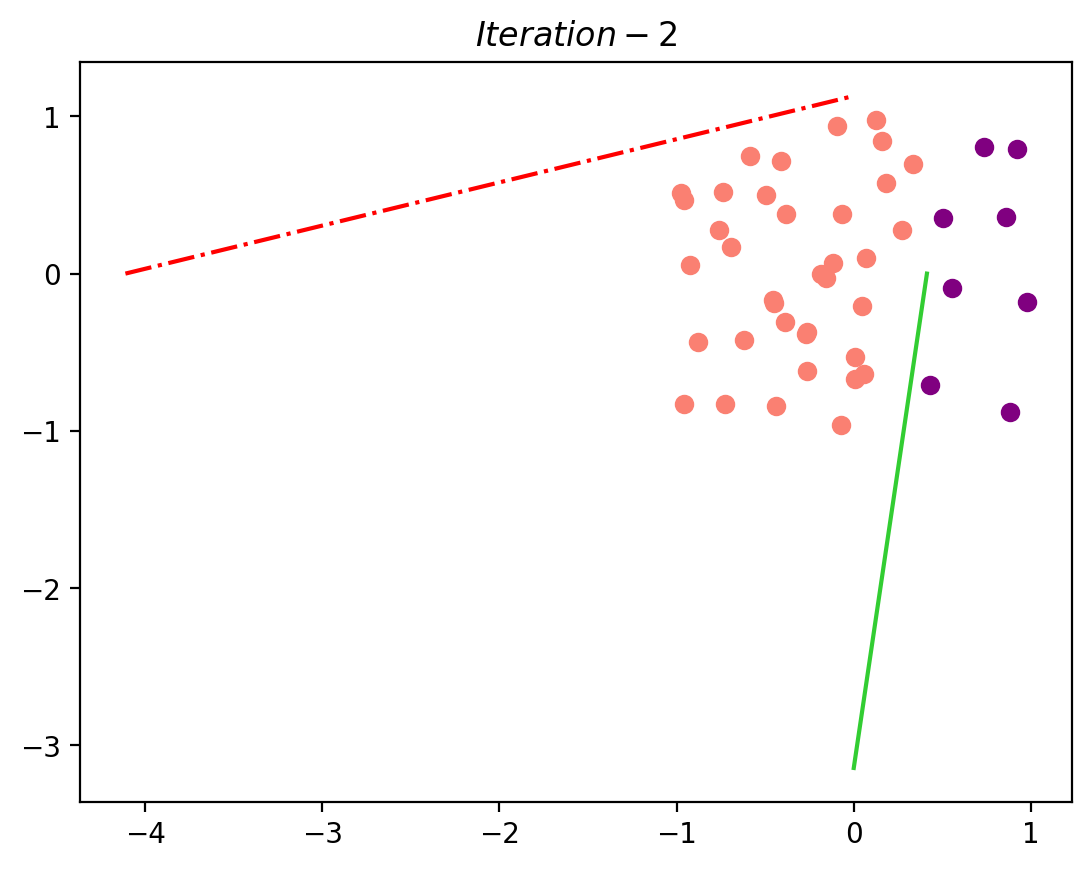

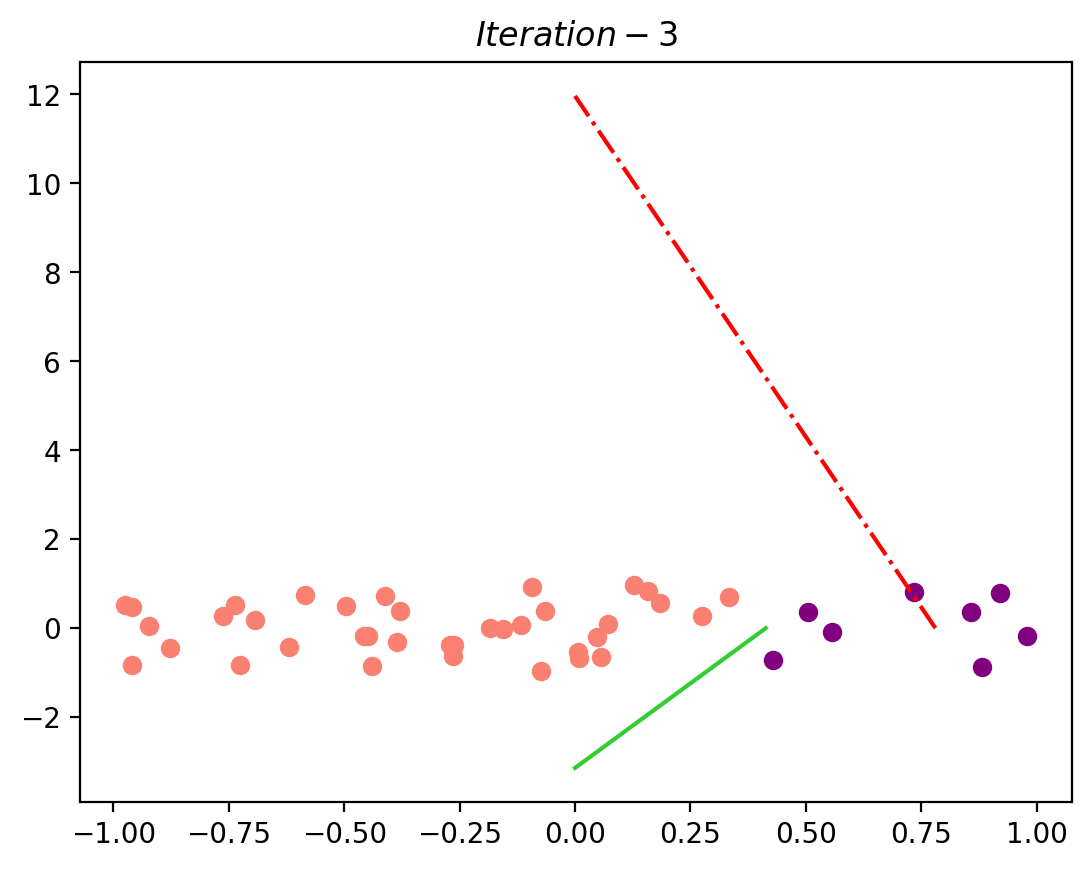

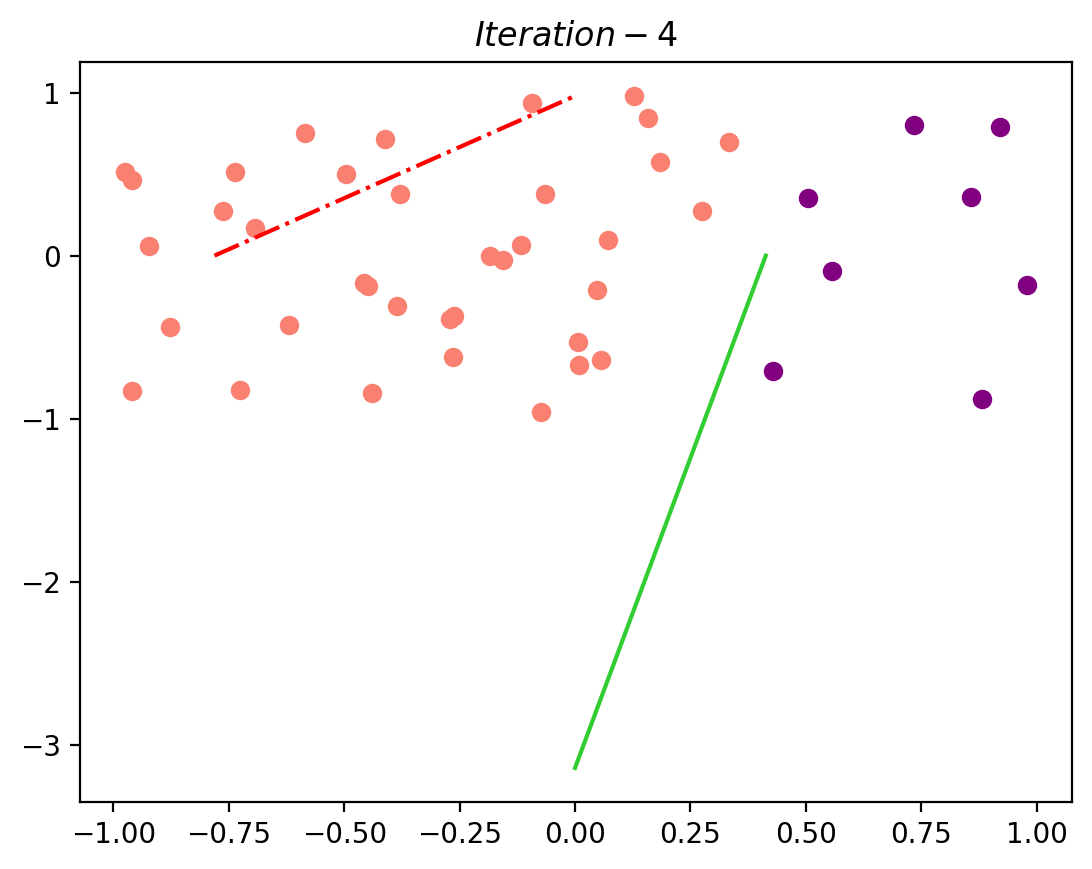

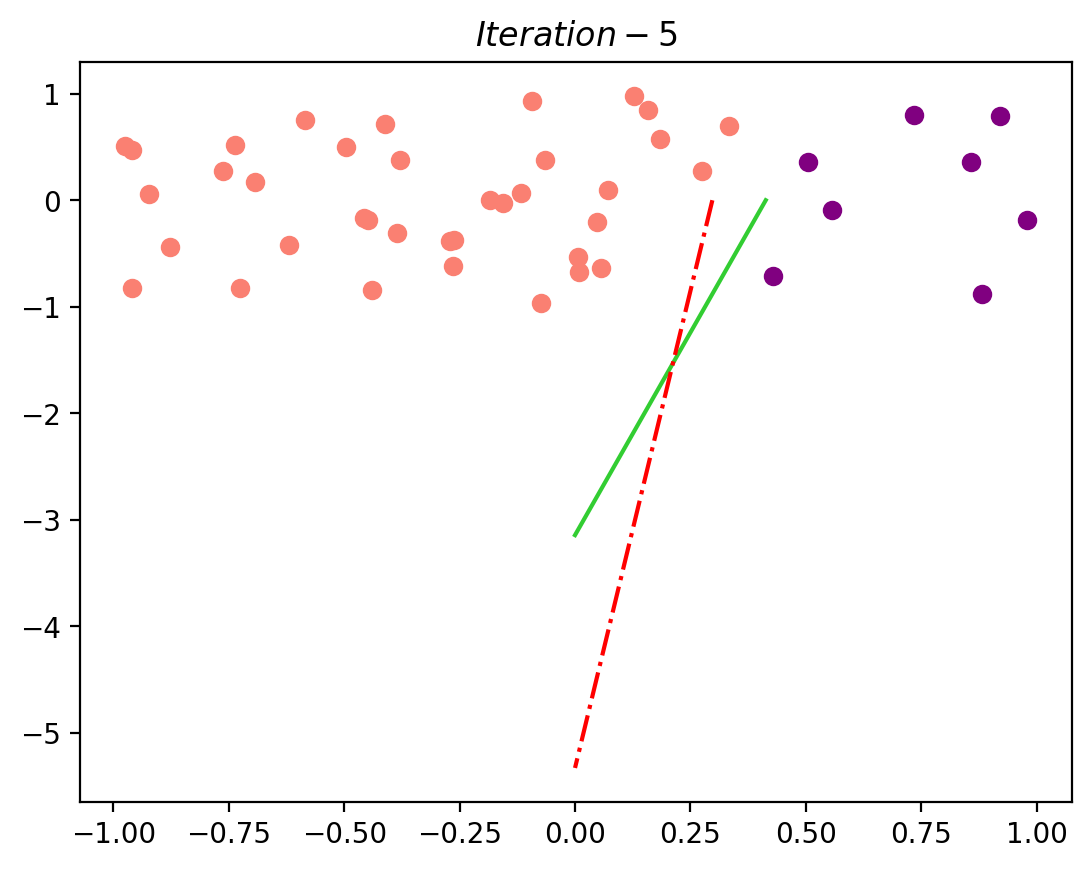

In [8]:
for i in range(len(H)) :
    hyp_icpt_01 = [-1*H[i][2]/H[i][0], 0]
    hyp_icpt_02 = [0, -1*H[i][2]/H[i][1]]
    fig_temp, ax_temp = plt.subplots()
    ax_temp.plot(intercept_01, intercept_02, color='limegreen', label='Target')
    for j in range(N_data) :
        if y[j] == 1 :
            ax_temp.scatter(x[j][0], x[j][1], color='salmon')
        else :
            ax_temp.scatter(x[j][0], x[j][1], color='purple')
    ax_temp.plot(hyp_icpt_01, hyp_icpt_02, color='red', ls='-.')
    ax_temp.set_title(f'$Iteration - {i+1}$')